In [22]:
# СОСНЮК КАТЕРИНА ФІТ 4-6 ВАРІАНТ 22 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Вибрати наступні параметри для нейронної мережі 
learning_rate = 0.001 # швидкість навчання нейронної мережі 

training_steps = 3000 # максимальна кількість епох 

batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковому підтримці з batch_size елементів 

display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат та точності 

n_hidden_1 = 128 # кількість нейронів 1-го шару 

n_hidden_2 = 256 # кількість нейронів 2-го шару 

In [24]:
#Побудувати модель, навчити
from tensorflow.keras.datasets import fashion_mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
num_classes = len(set(train_labels))
num_features = train_images.shape[1] * train_images.shape[2]
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [25]:
class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_features, out_features]), name="w"
        )
        self.b = tf.Variable(tf.zeros([out_features]), name="b")

    def __call__(self, x, activation=0):
        y = tf.matmul(x, self.w) + self.b
        if activation != 0:
            return tf.nn.softmax(y)
        else:
            return tf.nn.sigmoid(y)


class NN(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)
    self.layer_1 = DenseLayer(in_features=num_features, out_features=n_hidden_1)
    self.layer_2 = DenseLayer(in_features=n_hidden_1, out_features=n_hidden_2)
    self.layer_3 = DenseLayer(in_features=n_hidden_2, out_features=num_classes)

  def __call__(self, x):
    
    x1 = self.layer_1(x, activation=0)
    x2 = self.layer_2(x1, activation=0)
    x3 = self.layer_3(x2, activation=1)


    return x3

In [26]:

def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)

    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

def accuracy(y_pred, y_true):
    acc = tf.metrics.Accuracy()
    acc.update_state(y_true, tf.argmax(y_pred, axis=1))
    return acc.result()

In [27]:

neural_net = NN(name="mnist")

def train(nn, input_x, output_y):
  optimizer = tf.optimizers.SGD(learning_rate)

  with tf.GradientTape() as g:
    pred = neural_net(input_x)
    loss = cross_entropy(pred, output_y)
        
    trainable_variables = nn.trainable_variables
    gradients = g.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [28]:
loss_history = []  
accuracy_history = []
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps)):
    train(neural_net, batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x)
        current_loss = cross_entropy(pred, batch_y)
        loss_history.append(current_loss)
        
        current_accuracy = accuracy(pred, batch_y)
        accuracy_history.append(current_accuracy)
        print(f"Step: {step}, Loss: {current_loss}, Accuracy: {current_accuracy}")

Step: 0, Loss: 2868.7333984375, Accuracy: 0.14453125
Step: 100, Loss: 983.4278564453125, Accuracy: 0.59765625
Step: 200, Loss: 889.2679443359375, Accuracy: 0.69921875
Step: 300, Loss: 720.087646484375, Accuracy: 0.703125
Step: 400, Loss: 624.7493286132812, Accuracy: 0.70703125
Step: 500, Loss: 258.4554748535156, Accuracy: 0.73828125
Step: 600, Loss: 158.05819702148438, Accuracy: 0.78125
Step: 700, Loss: 219.45242309570312, Accuracy: 0.7265625
Step: 800, Loss: 234.92433166503906, Accuracy: 0.7578125
Step: 900, Loss: 124.07998657226562, Accuracy: 0.83203125
Step: 1000, Loss: 166.79031372070312, Accuracy: 0.76953125
Step: 1100, Loss: 178.75799560546875, Accuracy: 0.7578125
Step: 1200, Loss: 151.12786865234375, Accuracy: 0.77734375
Step: 1300, Loss: 145.93447875976562, Accuracy: 0.82421875
Step: 1400, Loss: 153.50894165039062, Accuracy: 0.796875
Step: 1500, Loss: 193.92648315429688, Accuracy: 0.8125
Step: 1600, Loss: 120.02808380126953, Accuracy: 0.83203125
Step: 1700, Loss: 122.5405654907

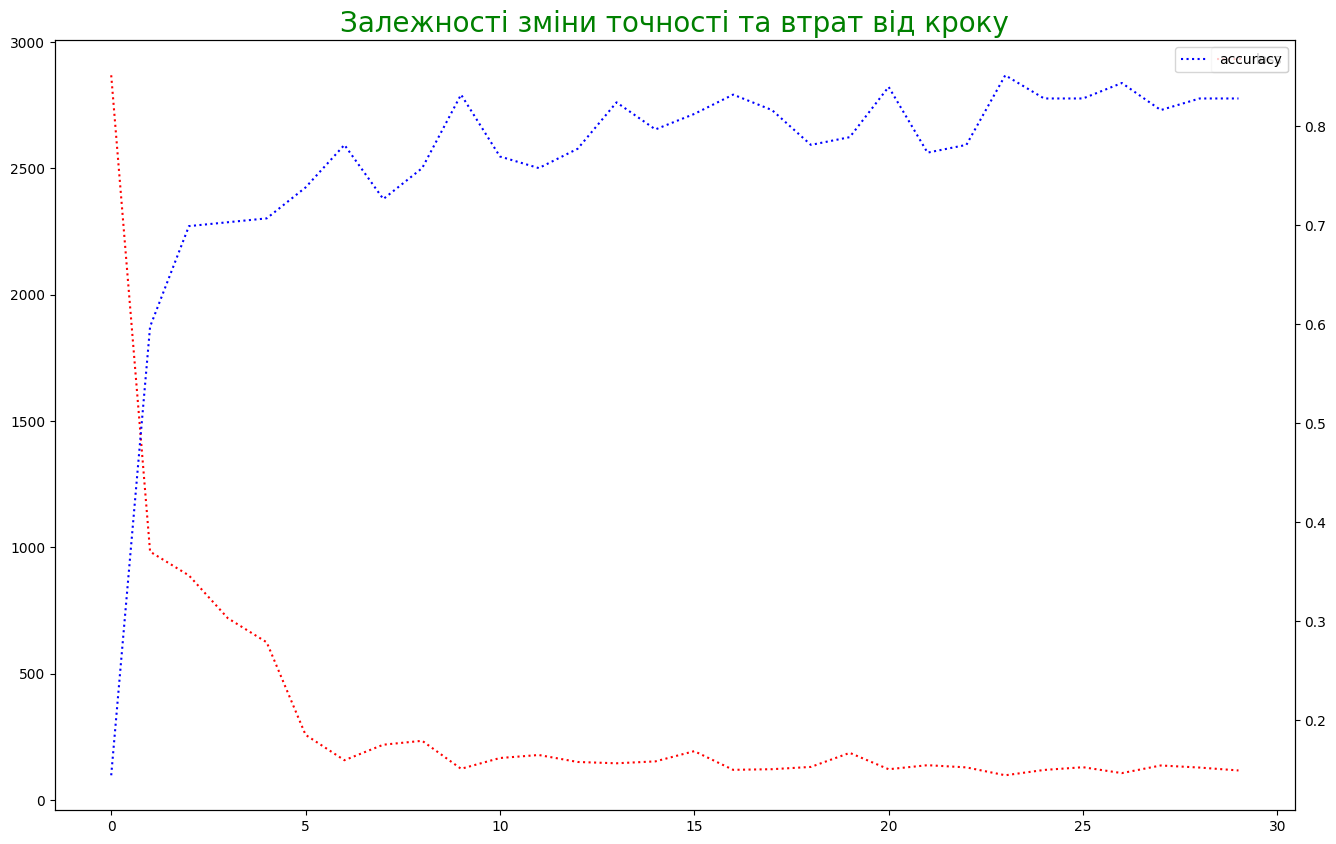

In [29]:
# Побудувати графіки функції втрат і точності
import pandas as pd

fig, axs = plt.subplots(figsize=(16, 10))
axs.plot(loss_history, 'r', label='loss', linestyle=":")
axs.legend()

axs2=axs.twinx()
axs2.plot(accuracy_history, 'b', label='accuracy', linestyle=":")
plt.legend()

plt.title('Залежності зміни точності та втрат від кроку', fontsize=20, color='g')
plt.show()

In [30]:
#Обчислити точність

neural_net_accuracy = accuracy(neural_net(x_train), y_train)
print(f"Точність: {neural_net_accuracy}")

Точність: 0.823033332824707


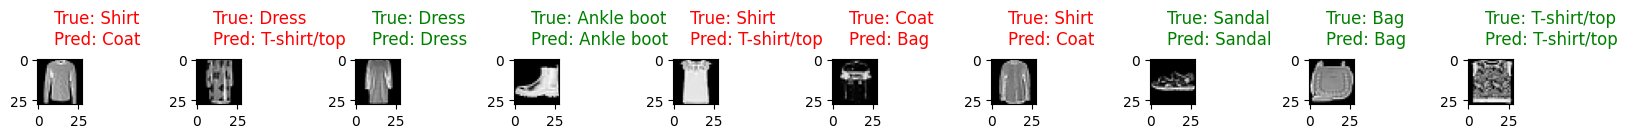

In [31]:
#Вивести 10 випадкових зображень. Вивести назву класу і передбачення. 

import numpy as np
import matplotlib.pyplot as plt

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

test_img = np.random.permutation(x_test.shape[0])[:10]
y_test_true = y_test[test_img]
pred_data = [np.argmax(neural_net(x_test[test_img[i:i+1]])) for i in range(10)]

plt.figure(figsize=(16, 6))

for i in range(10):
    is_correct = y_test_true[i] == pred_data[i] 
    label_color = 'green' if is_correct else 'red' 
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[test_img[i]].reshape(28, 28), cmap='gray')
    true_class = class_names[y_test_true[i]]
    pred_class = class_names[pred_data[i]]
    plt.text(x=10, y=-10, s=f'True: {true_class}\nPred: {pred_class}', fontsize=12, color=label_color)

plt.tight_layout()
plt.show()


In [ ]:
#ВИСНОВОК Було побудовано нейронну мережу для датасету fashion_mnist. Вона робить доволі точні передбачення, але менш точні аніж мережа із прикладу для розпізнавання цифр.